In [5]:
from scipy.stats import bernoulli
from scipy.stats import binom
from scipy.stats import poisson
from scipy.stats import gamma

import pandas as pd
import matplotlib.pyplot as plt

# Bernoulli, Binomial, Poisson, Gamma

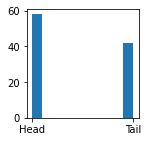

In [67]:
plt.figure(figsize=(2,2))
plt.hist([["Head", "Tail"][int(nr)] for nr in bernoulli.rvs(p=0.5, size=100)])
plt.show()

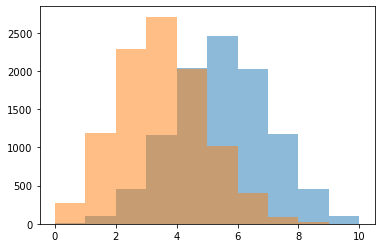

In [64]:
plt.hist(binom.rvs(n=10, p=0.5, size=10000), alpha=0.5)
plt.hist(binom.rvs(n=10, p=0.3, size=10000), alpha=0.5)
plt.show()

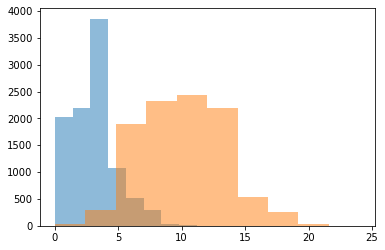

In [70]:
plt.hist(poisson.rvs(mu=3, size=10000), alpha=0.5)
plt.hist(poisson.rvs(mu=10, size=10000), alpha=0.5)
plt.show()

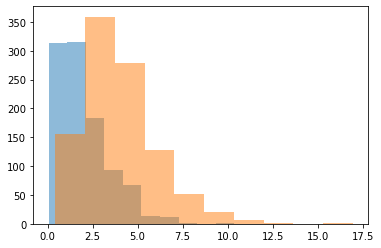

In [75]:
plt.hist(gamma.rvs(1.99, size=1000).round(2), alpha=0.5)
plt.hist(gamma.rvs(4, size=1000).round(2), alpha=0.5)
plt.show()

# Read RData

In [3]:
# https://stackoverflow.com/questions/47833692/converting-rda-to-pandas-dataframe
# https://github.com/bnicenboim/bcogsci
! pip install pyreadr
import pyreadr

In [6]:
df_spacebar = pyreadr.read_r("https://github.com/bnicenboim/bcogsci/raw/master/data/df_spacebar.rda")
df_spacebar

PyreadrError: File b'https://github.com/bnicenboim/bcogsci/raw/master/data/df_spacebar.rda' does not exist!

In [7]:
! pip install feather-format
import feather

In [8]:
datafile = feather.read_dataframe("https://github.com/bnicenboim/bcogsci/raw/master/data/df_spacebar.rda")

FileNotFoundError: [Errno 2] Failed to open local file 'https://github.com/bnicenboim/bcogsci/raw/master/data/df_spacebar.rda'. Detail: [errno 2] No such file or directory

In [9]:
! wget "https://github.com/bnicenboim/bcogsci/raw/master/data/df_spacebar.rda"

--2023-02-12 18:59:58--  https://github.com/bnicenboim/bcogsci/raw/master/data/df_spacebar.rda
Resolving github.com (github.com)... 140.82.113.4
Connecting to github.com (github.com)|140.82.113.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/bnicenboim/bcogsci/master/data/df_spacebar.rda [following]
--2023-02-12 18:59:58--  https://raw.githubusercontent.com/bnicenboim/bcogsci/master/data/df_spacebar.rda
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.109.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1066 (1.0K) [application/octet-stream]
Saving to: ‘df_spacebar.rda’

df_spacebar.rda     100%[===================>]   1.04K  --.-KB/s    in 0s      

2023-02-12 18:59:59 (28.7 MB/s) - ‘df_spacebar.rda’ saved [1066/1066]



In [11]:
df_spacebar = pyreadr.read_r("/kaggle/working/df_spacebar.rda")
df_spacebar

OrderedDict([('df_spacebar',
                    rt  trial
              0    141      1
              1    138      2
              2    128      3
              3    132      4
              4    126      5
              ..   ...    ...
              356  182    357
              357  179    358
              358  177    359
              359  183    360
              360  162    361
              
              [361 rows x 2 columns])])

In [12]:
datafile = feather.read_dataframe("/kaggle/working/df_spacebar.rda")
datafile

ArrowInvalid: Not a Feather V1 or Arrow IPC file

# Spacebar Dataset

In [22]:
# df_spacebar = df_spacebar["df_spacebar"]
df_spacebar

,rt,trial
0,141,1
1,138,2
2,128,3
3,132,4
4,126,5
...,...,...
356,182,357
357,179,358
358,177,359
359,183,360


<AxesSubplot:>

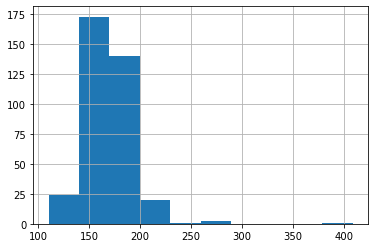

In [25]:
df_spacebar.rt.hist()

<AxesSubplot:xlabel='rt', ylabel='Density'>

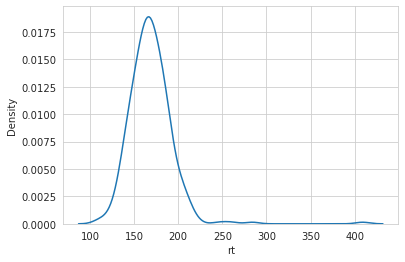

In [27]:
# https://stackoverflow.com/questions/4150171/how-to-create-a-density-plot-in-matplotlib
import numpy as np
import seaborn as sns

sns.set_style('whitegrid')
sns.kdeplot(df_spacebar.rt)

In [29]:
# https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html
from sklearn.linear_model import LinearRegression

# Linear Model

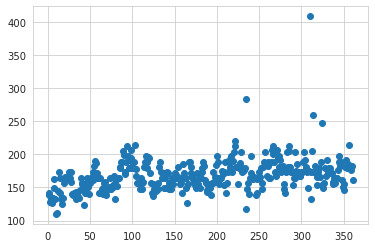

In [40]:
plt.scatter(df_spacebar.trial, df_spacebar.rt)

In [43]:
reg = LinearRegression().fit(np.array(df_spacebar.trial).reshape(-1, 1), df_spacebar.rt)
reg.intercept_

152.53467220683288

In [48]:
df_spacebar.rt.std().round(4)

24.9118

In [45]:
df_spacebar.rt.mean().round(4)

168.6399

# Bayesian Model

In [49]:
# https://github.com/adamhaber/pybrms
! pip install pybrms

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 214.2/214.2 kB 1.0 MB/s eta 0:00:00a 0:00:01
  Installing build dependencies ... done
  Getting requirements to build wheel ... error
  error: subprocess-exited-with-error
  
  × Getting requirements to build wheel did not run successfully.
  │ exit code: 1
  ╰─> [6 lines of output]
      Unable to determine R home: [Errno 2] No such file or directory: 'R': 'R'
      cffi mode is CFFI_MODE.ANY
      Looking for R home with: R RHOME
      Unable to determine R home: [Errno 2] No such file or directory: 'R': 'R'
      R home found: None
      Error: rpy2 in API mode cannot be built without R in the PATH or R_HOME defined. Correct this or force ABI mode-only by defining the environment variable RPY2_CFFI_MODE=ABI
      [end of output]
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
error: subprocess-exited-with-error

× Getting requirements to build wheel did not run successfully.
│ exit code: 1
╰─> See

In [ ]:
! conda create -c conda-forge -n pymc_env "pymc>=4"
! conda activate pymc_env

Solving environment: failed with repodata from current_repodata.json, will retry with next repodata source.
Solving environment: \ 